In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.io
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

from plotly.offline import  download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()

### INFO

I'm using interactive regime which compiles in 1st cell, but for GitHib pull I switch render to 'svg'

In [2]:
py.io.renderers.default = 'svg'
py.io.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

# Configs

In [3]:
def font_config(
        size: int
        ) -> dict:

    temp_config = dict(
        family = 'Arial',
        size = size,
        color = 'white',
        )

    return temp_config


x_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

y_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

margin_config = dict(
        autoexpand = True,
        l = 100,
        r = 20,
        t = 80,
        b = 20
        )

legend_config = dict(
        font = font_config(18)
        )

# Box plots

In [4]:
df_tips: pd.DataFrame = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
fig = px.box(
        data_frame = df_tips,
        x='smoker',
        y ='tip',
        points = 'all',
        hover_data = ['sex'],
        color = 'sex'
        )

fig = fig.update_layout(
        xaxis_title = 'SMOKER',
        yaxis_title = 'TIP',

        legend_title = 'Sex group',
        legend = legend_config,

        font = font_config(size = 32),

        xaxis = x_axis_config,
        yaxis = y_axis_config,

        autosize = True,
        #width = 1700,
        #height = 600,

        margin = margin_config,
        showlegend = True,
        #plot_bgcolor = 'snow'
        )

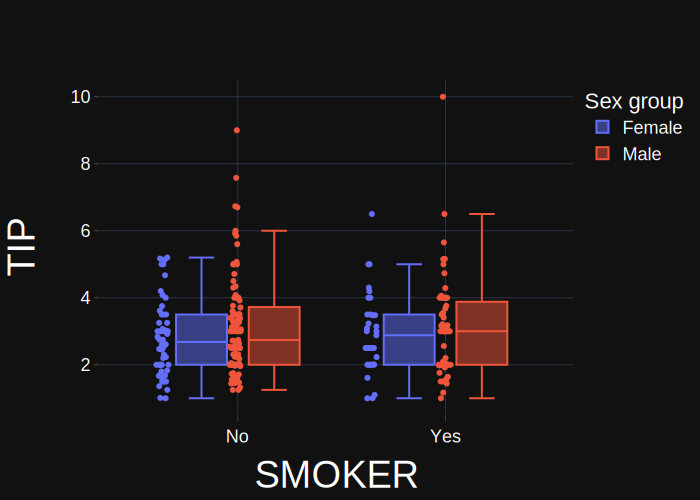

In [6]:
fig.show()

In [13]:
fig = px.box(
        data_frame = df_tips,
        x='day',
        y ='tip',
        points = 'suspectedoutliers',
        hover_data = ['sex'],
        color = 'sex',
        #notched = True,
        boxmode ='group' # 'overlay'
        )

fig = fig.update_traces(
        quartilemethod="inclusive"
        )

fig = fig.update_layout(
        xaxis_title = 'SMOKER',
        yaxis_title = 'TIP',

        legend_title = 'Sex group',
        legend = legend_config,

        font = font_config(size = 32),

        xaxis = x_axis_config,
        yaxis = y_axis_config,

        autosize = True,
        width = 1200,
        height = 800,
        yaxis_range = [0,8],

        margin = margin_config,
        showlegend = True,
        #plot_bgcolor = 'snow'
        )

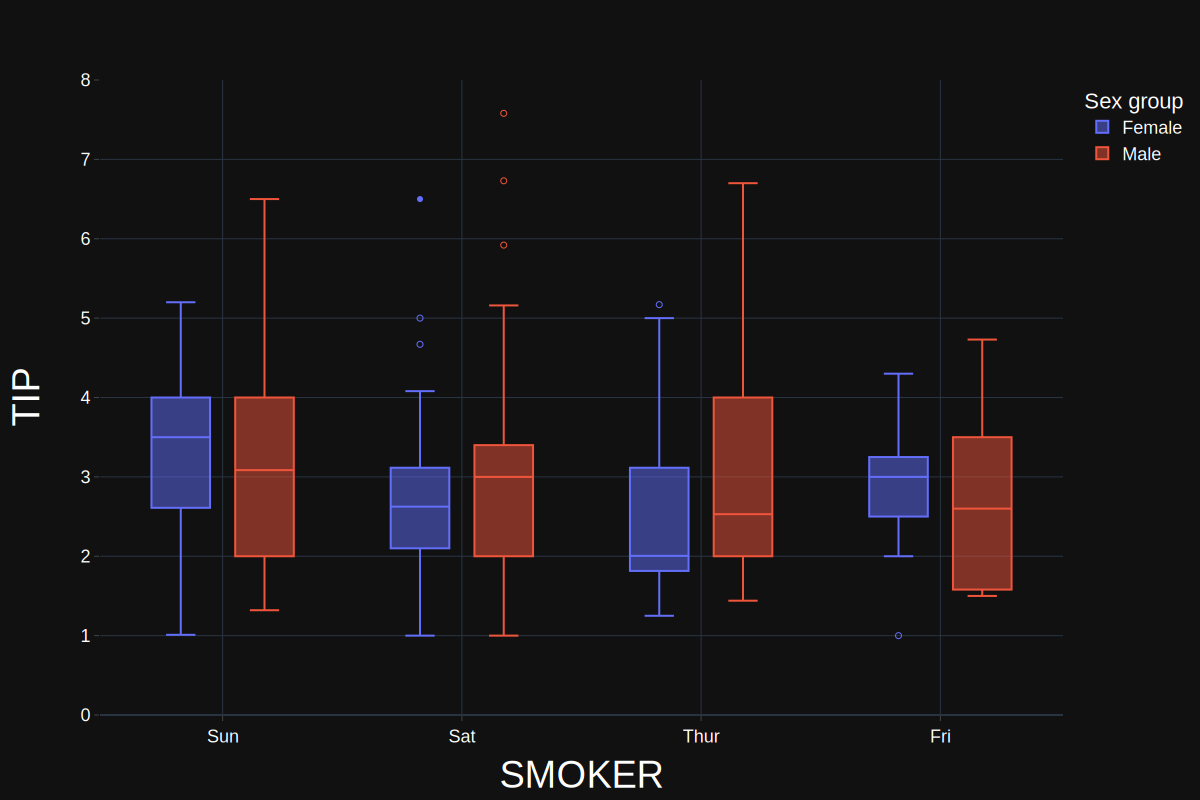

In [14]:
fig.show()

# Go

In [9]:
fig = go.Figure()

fig = fig.add_trace(
        go.Box(
                x = df_tips.day,
                y = df_tips.total_bill,
                boxmean = 'sd',
                )
        )

fig = fig.update_layout(
        height = 1000,
        )

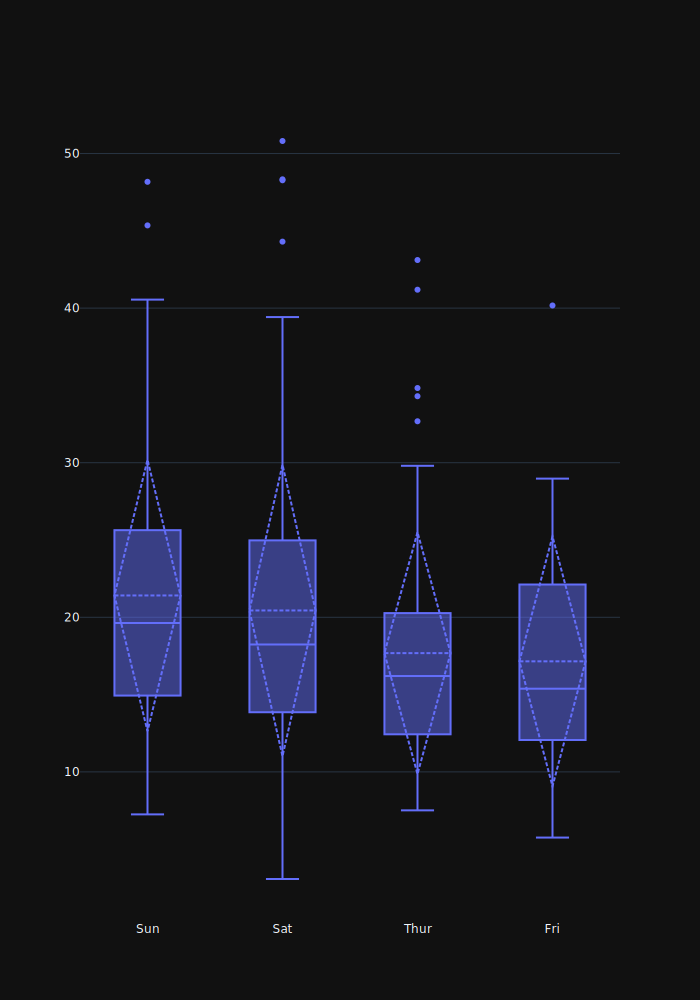

In [10]:
fig.show()

In [11]:
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


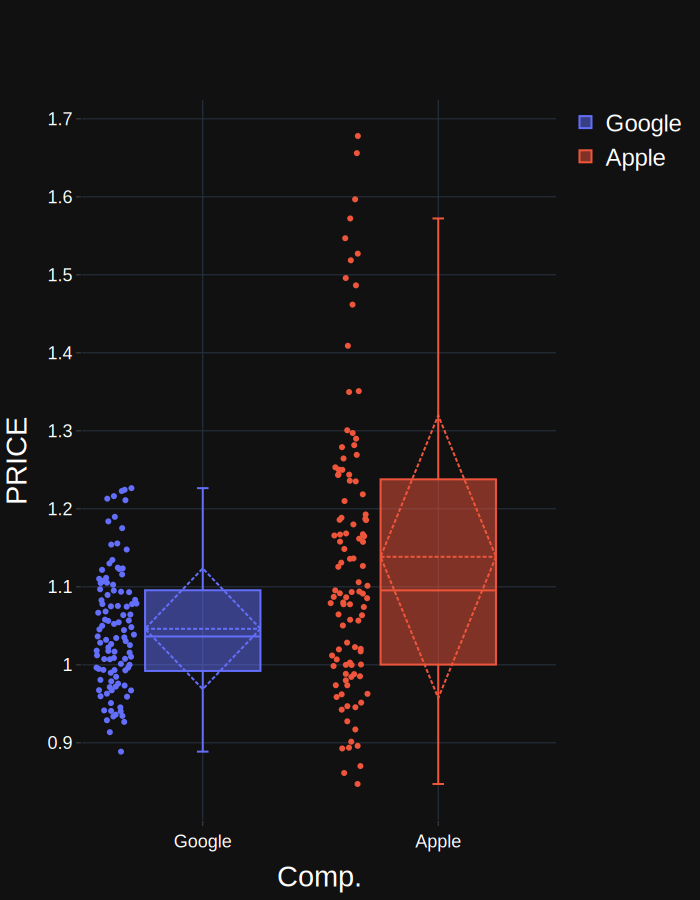

In [12]:
fig = go.Figure()

fig = fig.add_traces([
        go.Box(
                y = df_stocks.GOOG,
                boxpoints = 'all',
                name = 'Google',
                boxmean = 'sd',
                jitter = 0.4,
                whiskerwidth = 0.1
                ),

        go.Box(
                y = df_stocks.AAPL,
                boxpoints = 'all',
                name = 'Apple',
                boxmean = 'sd',
                jitter = 0.4,
                whiskerwidth = 0.1
                )
        ])

fig.update_layout(
        height = 900,

        yaxis_title = 'PRICE',
        xaxis_title = 'Comp.',

        xaxis = x_axis_config,
        yaxis = y_axis_config,

        font = font_config(size = 24),

        #paper_bgcolor = 'black'
        #plot_bgcolor = 'white'

        )

fig.show()